In [33]:
import numpy as np
from matplotlib import pyplot as plt
from torchvision import transforms
from PIL import Image
from torch.autograd import Variable

In [34]:
# image = Image.open("headsegmentationdataset/test3/816065_original.jpg")
image = Image.open("headsegmentationdataset/test3/download.jpg")

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224),interpolation=Image.NEAREST),
    # transforms.Resize(224),
                                      transforms.ToTensor(),
                                      normalize,
                                     ])
image_tensor = test_transforms(image).float()
image_tensor = image_tensor.unsqueeze_(0)
input = Variable(image_tensor)
print(input.shape)

torch.Size([1, 3, 224, 224])


In [35]:
import torch
from PIL import Image
import cv2
import segmentation_models_pytorch as smp

CLASSES = [0, 29, 76, 105, 128, 150, 179, 211, 226, 255]
aux_params = None

logdir = "./logs/segmentation"

model = smp.FPN(encoder_name="mobilenet_v2", classes=len(CLASSES), aux_params=aux_params)
model_state = torch.load(f"{logdir}/checkpoints/best.pth")
model.load_state_dict(model_state['model_state_dict'])

<All keys matched successfully>

In [36]:
y = model(input)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Text(0.5, 1.0, 'Image')

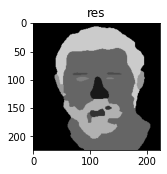

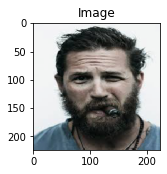

In [39]:
from catalyst import utils

res = torch.argmax(y[0], dim=0)
res = np.asarray(res)
v = 255/len(CLASSES)
res = res*v - 1
res = res.astype("int")

plt.figure(figsize=(5, 7))
plt.subplot(1, 2, 1)
plt.imshow(res, cmap='gray', vmin=0, vmax=255)
plt.title(f"res")

# image is ok
image = utils.tensor_to_ndimage(input[0])
plt.figure(figsize=(5, 7))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title(f"Image")